In [1]:
import altair as alt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
os.getcwd()

'C:\\Users\\35389'

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
data_unemp = pd.read_excel('Unemployment.xls', sheet_name = 'Unemployment Med HH Inc')

In [4]:
data_unemp.dropna(inplace=True)
data_unemp.reset_index(drop=True, inplace=True)
data_unemp_agg = data_unemp[data_unemp.FIPS % 1000 == 0]
data_unemp_agg.reset_index(inplace=True, drop=True)
data_unemp = data_unemp[data_unemp.FIPS % 1000 != 0]
data_unemp.head()

FIPS State           Area_name  Civilian_labor_force_2007  Employed_2007  \
1  1001    AL  Autauga County, AL                      24383          23577   
2  1003    AL  Baldwin County, AL                      82659          80099   
3  1005    AL  Barbour County, AL                      10334           9684   
4  1007    AL     Bibb County, AL                       8791           8432   
5  1009    AL   Blount County, AL                      26629          25780   

   Unemployed_2007  Unemployment_rate_2007  Civilian_labor_force_2008  \
1              806                     3.3                      24687   
2             2560                     3.1                      83223   
3              650                     6.3                      10161   
4              359                     4.1                       8749   
5              849                     3.2                      26698   

   Employed_2008  Unemployed_2008  ...  Civilian_labor_force_2017  \
1          23420             1267  ...                    25972.0   
2          79372             3851  ...                    92090.0   
3           9267              894  ...                     8317.0   
4           8241              508  ...                     8550.0   
5          25453             1245  ...                    24725.0   

   Employed_2017  Unemployed_2017  Unemployment_rate_2017  \
1        24958.0           1014.0                     3.9   
2        88342.0           3748.0                     4.1   
3         7831.0            486.0                     5.8   
4         8174.0            376.0                     4.4   
5        23726.0            999.0                     4.0   

   Civilian_labor_force_2018  Employed_2018  Unemployed_2018  \
1                    25957.0        25015.0            942.0   
2                    93849.0        90456.0           3393.0   
3                     8373.0         7940.0            433.0   
4                     8661.0         8317.0            344.0   
5                    25006.0        24128.0            878.0   

   Unemployment_rate_2018  Median_Household_Income_2017  \
1                     3.6                       58343.0   
2                     3.6                       56607.0   
3                     5.2                       32490.0   
4                     4.0                       45795.0   
5                     3.5                       48253.0   

   Med_HH_Income_Percent_of_State_Total_2017  
1                                      121.1  
2                                      117.5  
3                                       67.4  
4                                       95.0  
5                                      100.1  

[5 rows x 53 columns]

In [5]:
data_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 1 to 3186
Data columns (total 53 columns):
FIPS                                         3136 non-null int64
State                                        3136 non-null object
Area_name                                    3136 non-null object
Civilian_labor_force_2007                    3136 non-null int64
Employed_2007                                3136 non-null int64
Unemployed_2007                              3136 non-null int64
Unemployment_rate_2007                       3136 non-null float64
Civilian_labor_force_2008                    3136 non-null int64
Employed_2008                                3136 non-null int64
Unemployed_2008                              3136 non-null int64
Unemployment_rate_2008                       3136 non-null float64
Civilian_labor_force_2009                    3136 non-null int64
Employed_2009                                3136 non-null int64
Unemployed_2009                           

In [6]:
Unemployment_rate_columns = [x for x in data_unemp.columns if 'Unemployment_rate' in x]
Unemployed_columns = [x for x in data_unemp.columns if 'Unemployed_' in x]
Employed_columns = [x for x in data_unemp.columns if 'Employed_' in x]
Civilian_labor_force_columns = [x for x in data_unemp.columns if 'Civilian_labor_force_' in x]

In [7]:
df_map = pd.read_csv('us_map.csv')

In [ ]:
#####Year Wise Unemployment Rate#####

In [8]:
df_map['Unemployment_rate_2007'] = data_unemp_agg[data_unemp_agg.State.isin(df_map.code)]['Unemployment_rate_2007']
df_map['Unemployment_rate_2012'] = data_unemp_agg[data_unemp_agg.State.isin(df_map.code)]['Unemployment_rate_2012']
df_map['Unemployment_rate_2018'] = data_unemp_agg[data_unemp_agg.State.isin(df_map.code)]['Unemployment_rate_2018']

fig07 = go.Figure(data=go.Choropleth(
    locations=df_map['code'], # Spatial coordinates
    z = df_map['Unemployment_rate_2007'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Unemployment Rate",
    text = df_map['state']
))

fig07.update_layout(
    title_text = '2007 US Unemployment Rate',
    geo_scope='usa', # limite map scope to USA
)

fig07.show()

fig12 = go.Figure(data=go.Choropleth(
    locations=df_map['code'], # Spatial coordinates
    z = df_map['Unemployment_rate_2012'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Unemployment Rate",
    text = df_map['state']
))

fig12.update_layout(
    title_text = '2012 US Unemployment Rate',
    geo_scope='usa', # limite map scope to USA
)

fig12.show()

fig18 = go.Figure(data=go.Choropleth(
    locations=df_map['code'], # Spatial coordinates
    z = df_map['Unemployment_rate_2018'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Unemployment Rate",
    text = df_map['state']
))

fig18.update_layout(
    title_text = '2018 US Unemployment Rate',
    geo_scope='usa', # limite map scope to USA
)

fig18.show()

In [9]:
date_range = np.arange(2007,2019,1)
df_hist1 = data_unemp_agg.copy()
df_hist1['Sum_of_unemployement_rate'] = data_unemp_agg[Unemployment_rate_columns].sum(axis=1)
df_hist1_sorted = df_hist1.sort_values('Sum_of_unemployement_rate', ascending=False)

In [ ]:
#####Unemployment Rate of States#####

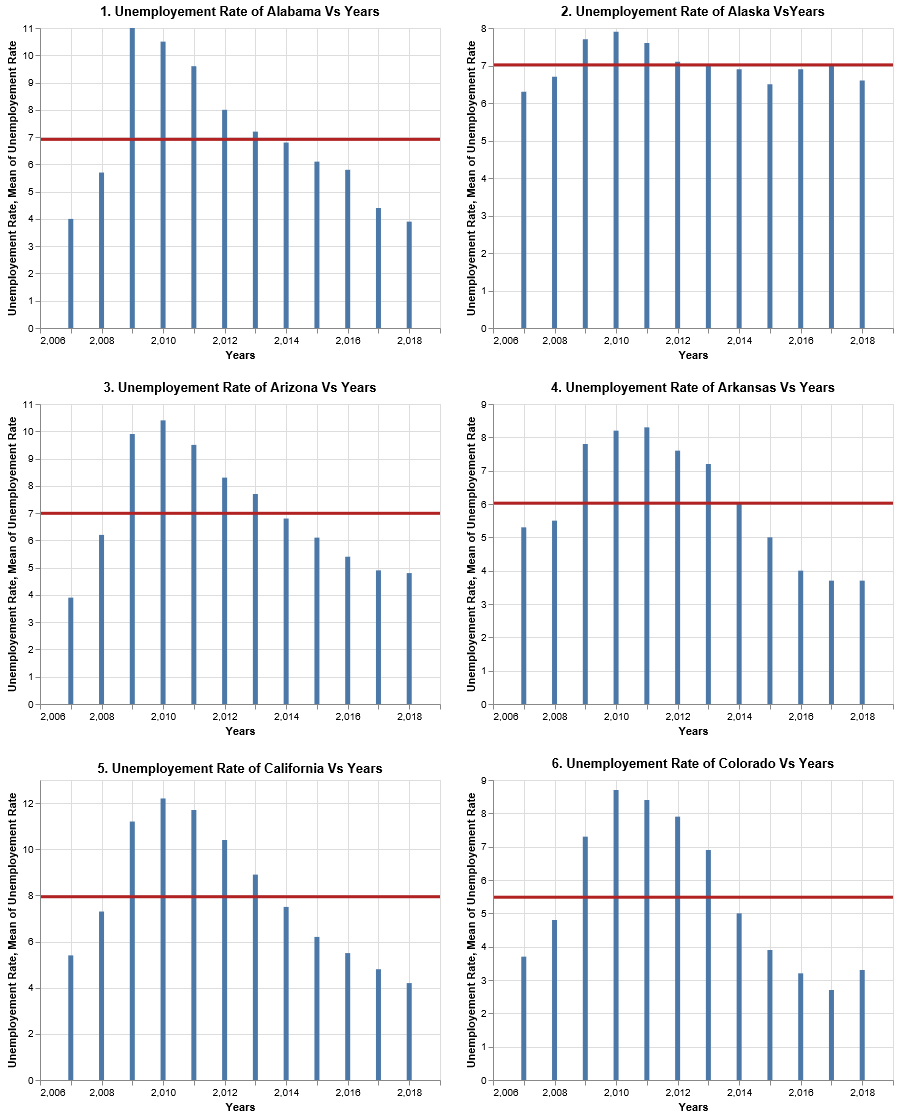

In [10]:
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='Years:Q',
    y='Unemployement Rate:Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(
    width=400,
    height=300).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Unemployement Rate):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

df1 = df_hist1_sorted.loc[0,:][Unemployment_rate_columns].values
df1 = pd.DataFrame(df1 , date_range)
df1 = df1.reset_index()
df1.columns = ['Years','Unemployement Rate']


df2 = df_hist1_sorted.loc[1,:][Unemployment_rate_columns].values
df2 = pd.DataFrame(df2 , date_range)
df2 = df2.reset_index()
df2.columns = ['Years','Unemployement Rate']

df3 = df_hist1_sorted.loc[2,:][Unemployment_rate_columns].values
df3 = pd.DataFrame(df3 , date_range)
df3 = df3.reset_index()
df3.columns = ['Years','Unemployement Rate']

df4 = df_hist1_sorted.loc[3,:][Unemployment_rate_columns].values
df4 = pd.DataFrame(df4 , date_range)
df4 = df4.reset_index()
df4.columns = ['Years','Unemployement Rate']

df5 = df_hist1_sorted.loc[4,:][Unemployment_rate_columns].values
df5 = pd.DataFrame(df5 , date_range)
df5 = df5.reset_index()
df5.columns = ['Years','Unemployement Rate']

df6 = df_hist1_sorted.loc[5,:][Unemployment_rate_columns].values
df6 = pd.DataFrame(df6 , date_range)
df6 = df6.reset_index()
df6.columns = ['Years','Unemployement Rate']
alt.vconcat(alt.hconcat(alt.layer(bars, line, data=df1, title = '1. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[0,'Area_name']), alt.layer(bars, line, data=df2, title = '2. Unemployement Rate of %s VsYears' %df_hist1_sorted.loc[1,'Area_name']))
,alt.hconcat(alt.layer(bars, line, data=df3, title = '3. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[2,'Area_name']), alt.layer(bars, line, data=df4, title = '4. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[3,'Area_name']))
,alt.hconcat(alt.layer(bars, line, data=df5, title = '5. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[4,'Area_name']), alt.layer(bars, line, data=df6, title = '6. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[5,'Area_name']))
)

In [ ]:
#####Yearly Unemployment Rate w.r.t. Area#####

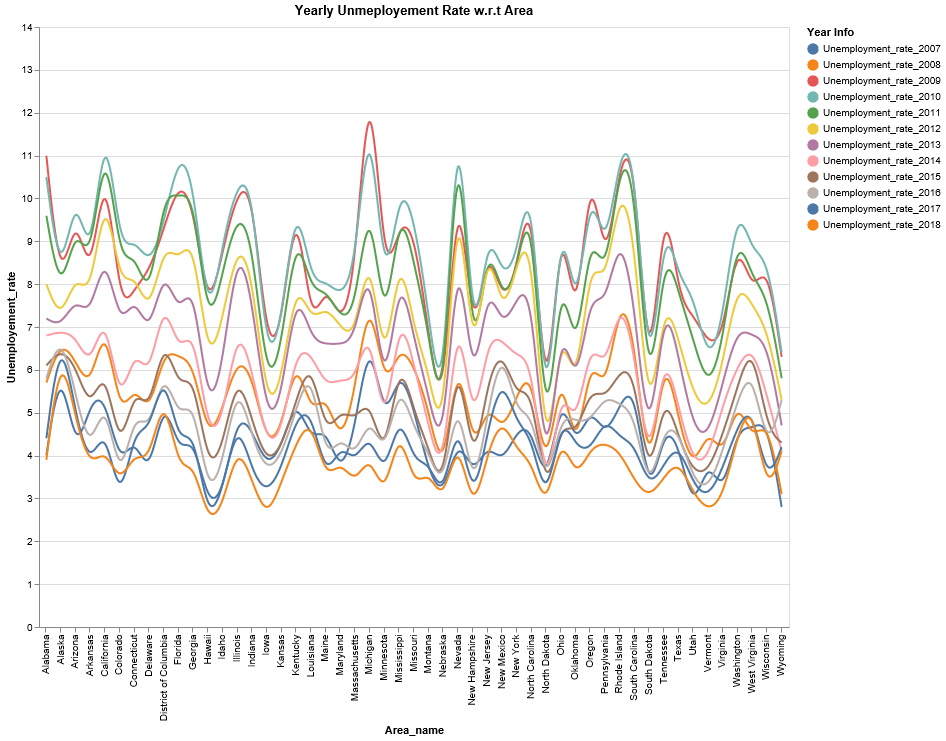

In [15]:
data_unemp_agg_line = data_unemp_agg[Unemployment_rate_columns+['Area_name']].set_index('Area_name')
data_unemp_agg_line = data_unemp_agg_line.reset_index().melt('Area_name', var_name = 'Year Info', value_name='Unemployement_rate')

# source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
#                     columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
# source = source.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Area_name'], empty='none')

# The basic line
line = alt.Chart(data_unemp_agg_line).mark_line(interpolate='basis').encode(
    x='Area_name:N',
    y='Unemployement_rate:Q',
    color='Year Info:N'
)
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(data_unemp_agg_line).mark_point().encode(
    x='Area_name:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Unemployement_rate:Q', alt.value(' '))
)
# Draw a rule at the location of the selection
rules = alt.Chart(data_unemp_agg_line).mark_rule(color='gray').encode(
    x='Area_name:N',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text, title='Yearly Unmeployement Rate w.r.t Area'
).properties(
    width=750, height=600
)

In [16]:
data_unemp_agg_heat = data_unemp_agg.copy()
diff =  data_unemp_agg_heat['Unemployment_rate_2018'].values - data_unemp_agg_heat['Unemployment_rate_2007'].values
x, y = (list(x) for x in zip(*sorted(zip(diff, data_unemp_agg_heat['Area_name'].values), 
                                                            reverse = True)))

# Now I want to extract out the top 15 and bottom 15 countries 
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

In [17]:
keys = [c for c in data_unemp_agg_heat if 'rate' in c]
keys

['Unemployment_rate_2007',
 'Unemployment_rate_2008',
 'Unemployment_rate_2009',
 'Unemployment_rate_2010',
 'Unemployment_rate_2011',
 'Unemployment_rate_2012',
 'Unemployment_rate_2013',
 'Unemployment_rate_2014',
 'Unemployment_rate_2015',
 'Unemployment_rate_2016',
 'Unemployment_rate_2017',
 'Unemployment_rate_2018']

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
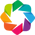

In [18]:
import numpy as np
import holoviews as hv
from holoviews import opts
import pandas as pd
hv.extension('bokeh')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#####Movement in Unemployment rate#####

Text(0.5, 1.0, 'Movement in Unemployment Rate ( Warmer: Higher rate, Cooler: Lower rate )')

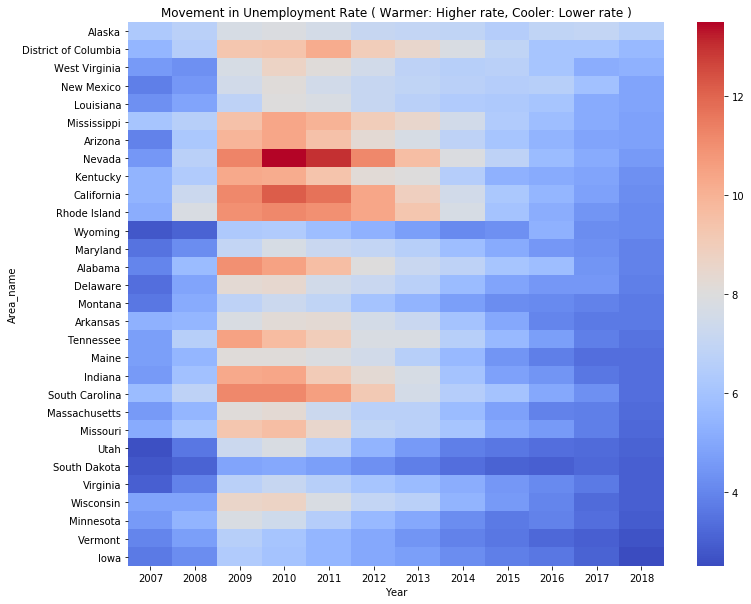

In [20]:
country_resize = pd.melt(data_unemp_agg_heat, id_vars='Area_name',value_vars=keys, value_name='key' )
country_resize['Year'] = country_resize['variable']
country_resize['Year'] = [country_resize.loc[i,'Year'].split('_')[-1] for i in range(len(country_resize)) ]

mask = country_resize['Area_name'].isin(Y)
country_final = country_resize[mask]

# Finally plot the seaborn heatmap
plt.figure(figsize=(12,10))
country_pivot = country_final.pivot("Area_name","Year",  "key")
country_pivot = country_pivot.sort_values('2018', ascending=False)
ax = sns.heatmap(country_pivot, cmap='coolwarm', annot=False, linewidths=0, linecolor='white')
plt.title('Movement in Unemployment Rate ( Warmer: Higher rate, Cooler: Lower rate )')

In [ ]:
#####2017 Unemployment Rate Vs Household Incomes#####

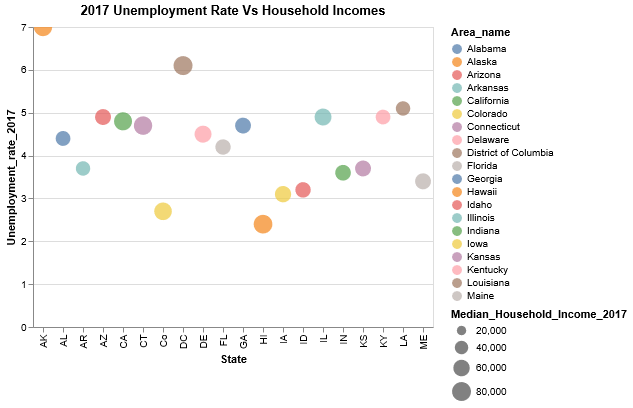

In [23]:
source = data_unemp_agg[:20]

alt.Chart(source).mark_circle().encode(
    x='State:O',
    y='Unemployment_rate_2017:Q',
#     alt.X('Median_Household_Income_2017', scale=alt.Scale(zero=False)),
#     alt.Y('Unemployment_rate_2017', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Median_Household_Income_2017',
	tooltip=['State', 'Unemployment_rate_2017', 'Area_name']
    
).properties(title='2017 Unemployment Rate Vs Household Incomes').interactive()


In [ ]:
#####2017 Employment Rate Vs Household Incomes#####

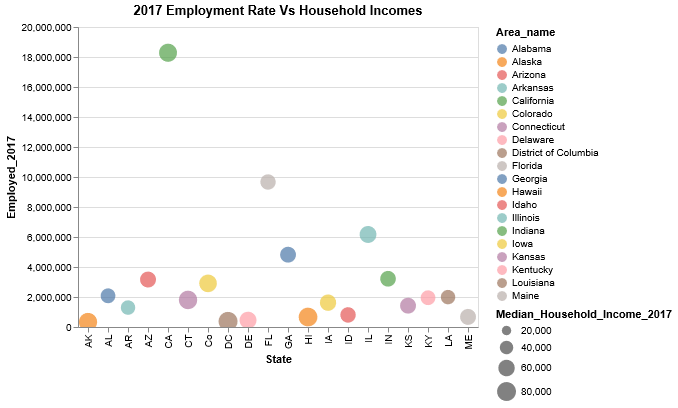

In [24]:
source = data_unemp_agg[:20]

alt.Chart(source).mark_circle().encode(
    x='State:O',
    y='Employed_2017:Q',
#     alt.X('Median_Household_Income_2017', scale=alt.Scale(zero=False)),
#     alt.Y('Unemployment_rate_2017', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Median_Household_Income_2017',
	tooltip=['State', 'Employed_2017', 'Area_name']
    
).properties(title='2017 Employment Rate Vs Household Incomes').interactive()

In [ ]:
#####2018 State wise Civil Force Vs Unemployed#####

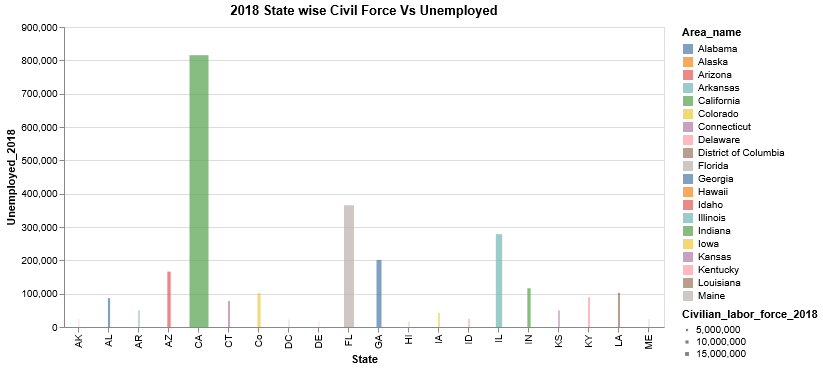

In [27]:
source = data_unemp_agg[:20]

alt.Chart(source).mark_bar(opacity=0.7).encode(
    x='State:O',
    y='Unemployed_2018:Q',
#     alt.X('Median_Household_Income_2017', scale=alt.Scale(zero=False)),
#     alt.Y('Unemployment_rate_2017', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Civilian_labor_force_2018',
    tooltip=['State', 'Unemployed_2018', 'Civilian_labor_force_2018']
).properties(title='2018 State wise Civil Force Vs Unemployed', width = 600).interactive()

In [ ]:
##### Net changes in Youth Unemployment for states of USA ######

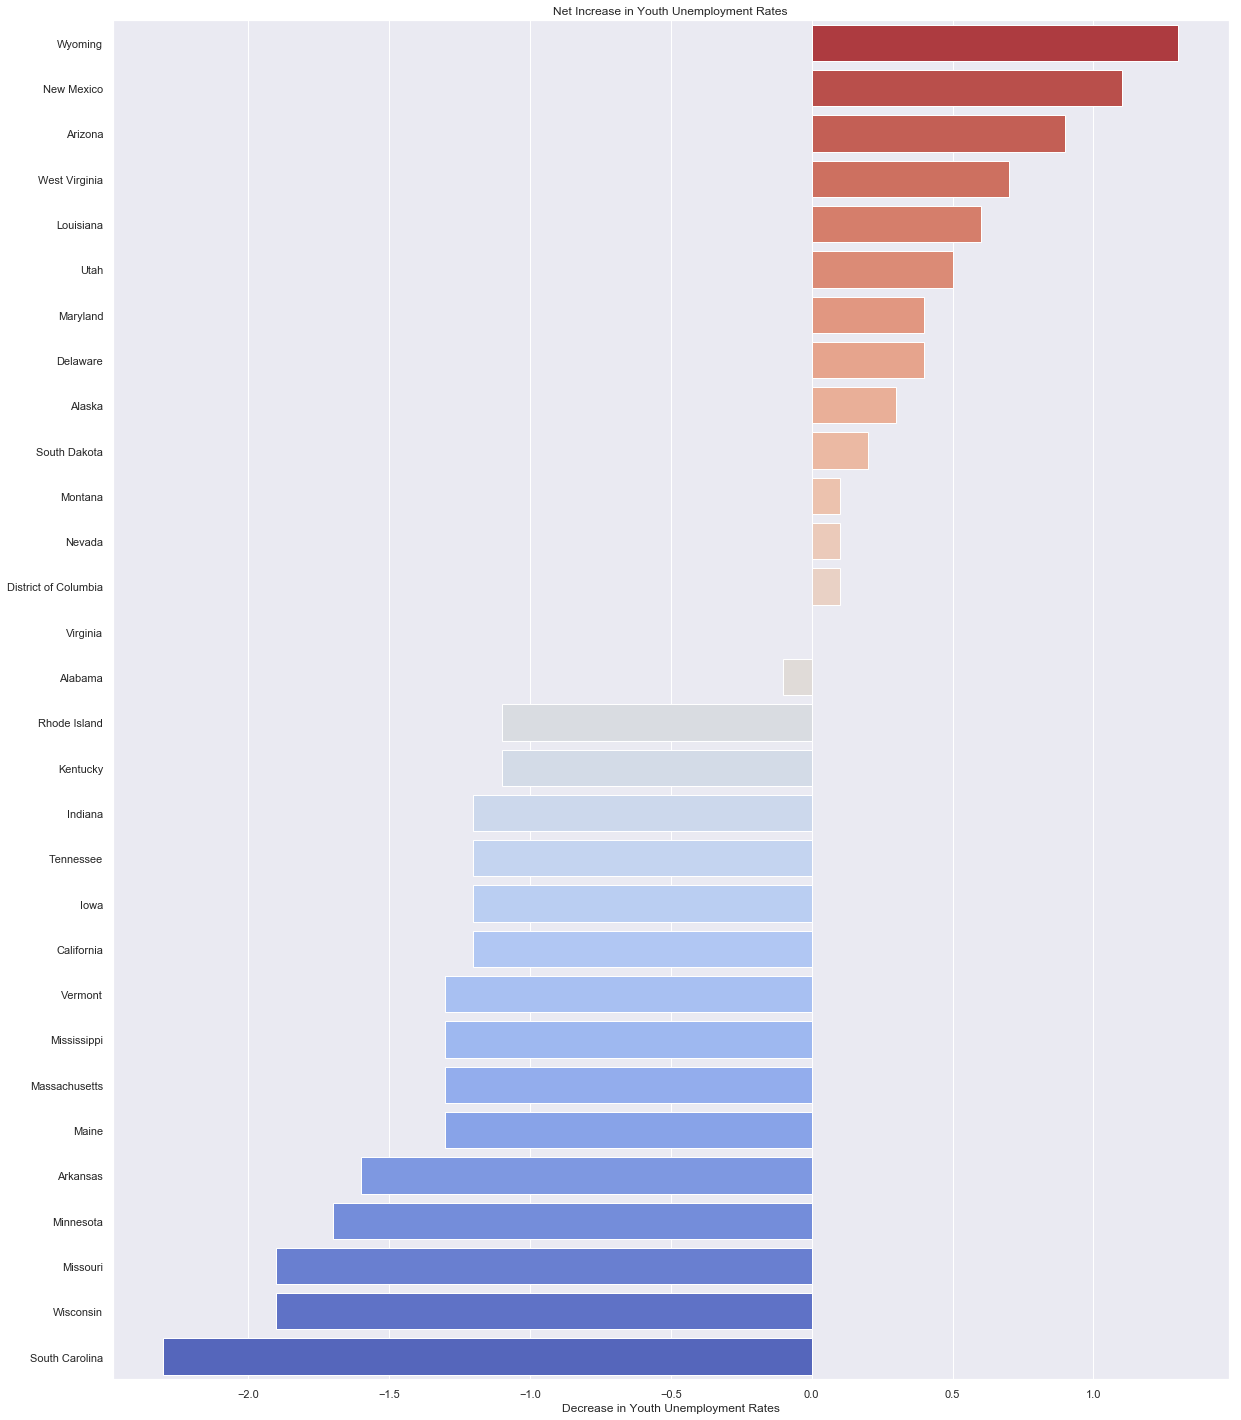

In [28]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 25))
colors_cw = sns.color_palette('coolwarm', len(X))
sns.barplot(X, Y, palette = colors_cw[::-1])
Text = ax.set(xlabel='Decrease in Youth Unemployment Rates', 
              title='Net Increase in Youth Unemployment Rates')

In [ ]:
##### Year wise Unemployed People Distribution #####

Text(0.5, 1.0, 'Year wise Unemployed People Distribution')

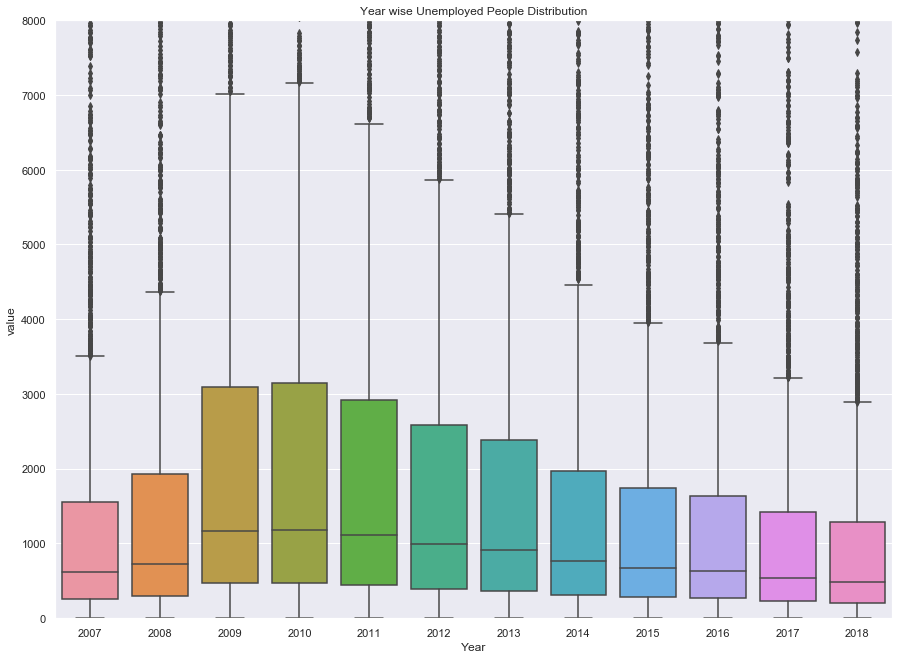

In [29]:
df_Unemployed = pd.melt(data_unemp[Unemployed_columns])
df_Unemployed['Year'] = df_Unemployed['variable'].apply(lambda row: row.split('_')[1])

sns.set(rc={'figure.figsize':(15,11)})

ax1 = sns.boxplot(x="Year", y="value", data=df_Unemployed)
ax1.set(ylim=(-5, 8000))
ax1.set_title('Year wise Unemployed People Distribution')

In [ ]:
##### Year wise Employed People Distribution #####

Text(0.5, 1.0, 'Year wise Employed People Distribution')

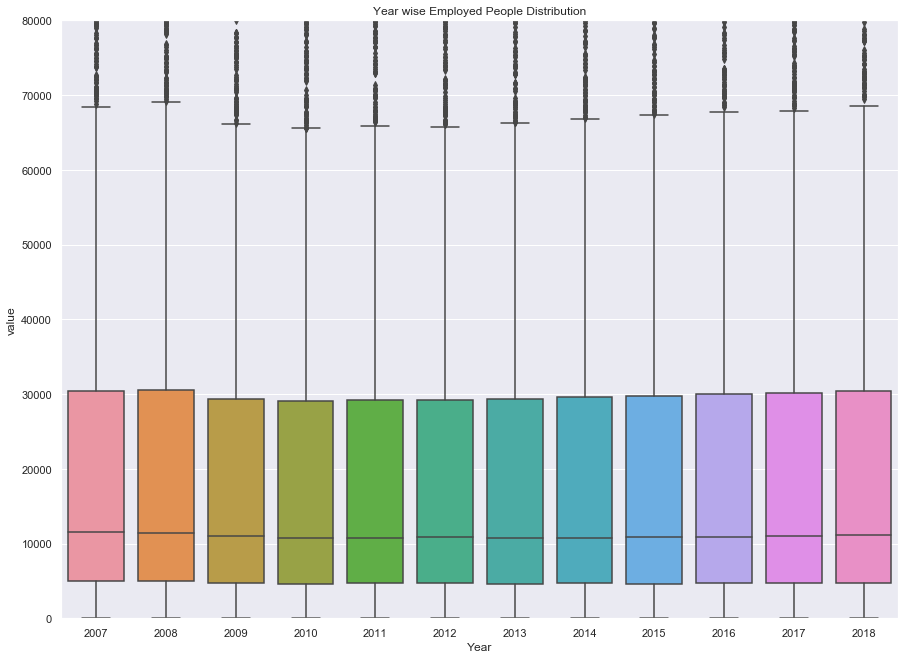

In [30]:
df_Employed = pd.melt(data_unemp[Employed_columns])
df_Employed['Year'] = df_Employed['variable'].apply(lambda row: row.split('_')[1])

sns.set(rc={'figure.figsize':(15,11)})

ax2 = sns.boxplot(x="Year", y="value", data=df_Employed)
ax2.set(ylim=(-5, 80000))
ax2.set_title('Year wise Employed People Distribution')

In [ ]:
##### Civilian labour force per year #####

Text(0.5, 1.0, 'Civilian Labor Force Comparison for 2007,2010,2013,2015,2018 & Total')

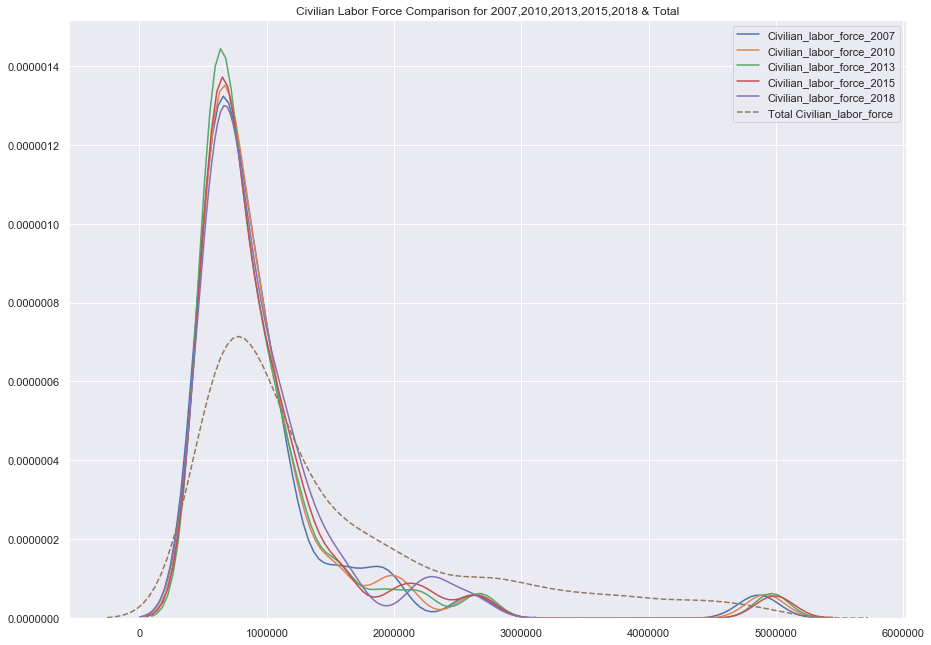

In [31]:
data_unemp['Total Civilian_labor_force'] = data_unemp[Civilian_labor_force_columns].sum(axis=1)

ax = sns.kdeplot(data_unemp[Civilian_labor_force_columns[0]], clip=(500000, 5000000) )
ax = sns.kdeplot(data_unemp[Civilian_labor_force_columns[3]], clip=(500000, 5000000) )
ax = sns.kdeplot(data_unemp[Civilian_labor_force_columns[6]], clip=(500000, 5000000) )
ax = sns.kdeplot(data_unemp[Civilian_labor_force_columns[8]], clip=(500000, 5000000) )
ax = sns.kdeplot(data_unemp[Civilian_labor_force_columns[11]], clip=(500000, 5000000) )
ax = sns.kdeplot(data_unemp['Total Civilian_labor_force'], linestyle="--", clip=(500000, 5000000) )

ax.set_title('Civilian Labor Force Comparison for 2007,2010,2013,2015,2018 & Total')

In [ ]:
######: Median Household Income 2017 #####

Text(0.5, 1.0, 'Median Household Income 2017')

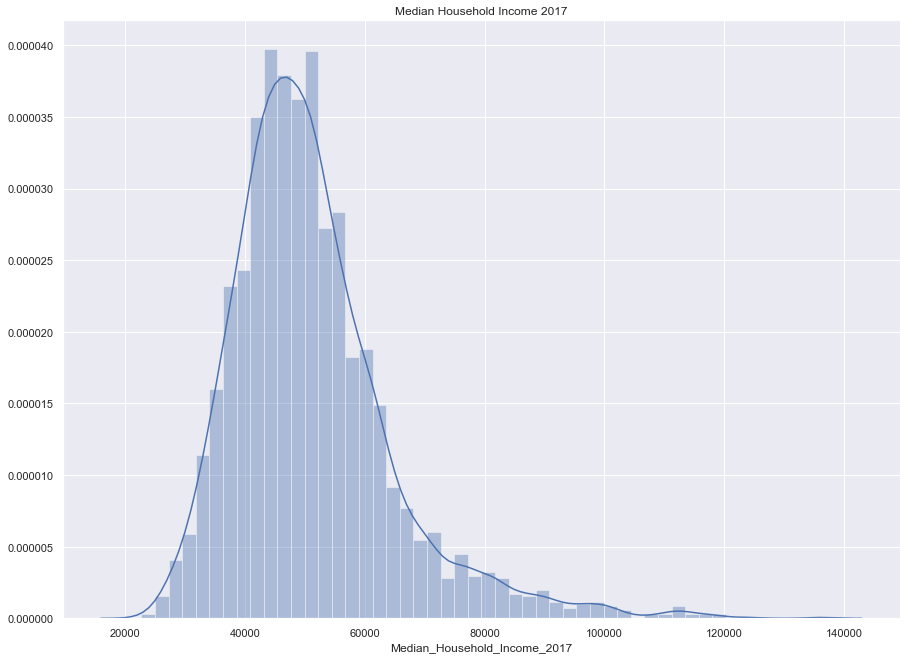

In [32]:
by = sns.distplot(data_unemp.Median_Household_Income_2017)
by.set_title('Median Household Income 2017')

In [ ]:
##### Median Household Income of Top 5 states #####

Text(0.5, 1.0, 'Median Household Income of Top 5 states')

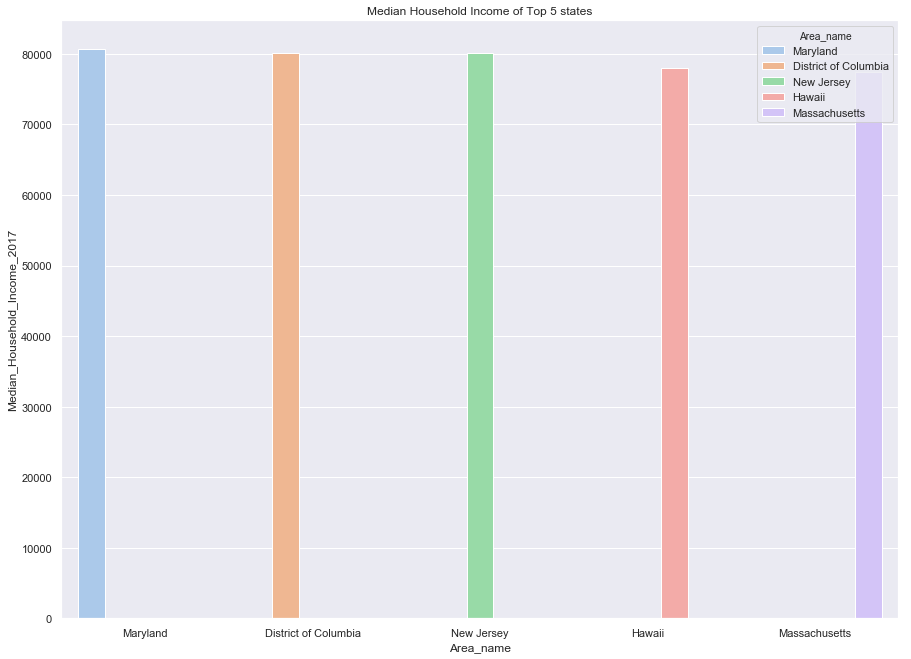

In [44]:
df_plot = data_unemp_agg.sort_values(["Median_Household_Income_2017"], ascending=False)
ax5 = sns.barplot(x="Area_name", y="Median_Household_Income_2017",hue="Area_name",palette="pastel", data=df_plot[:5])
ax5.set_title('Median Household Income of Top 5 states')

In [ ]:
##### Median Household Income of Bottom 5 states #####

Text(0.5, 1.0, 'Median Household Income of Bottom 5 states')

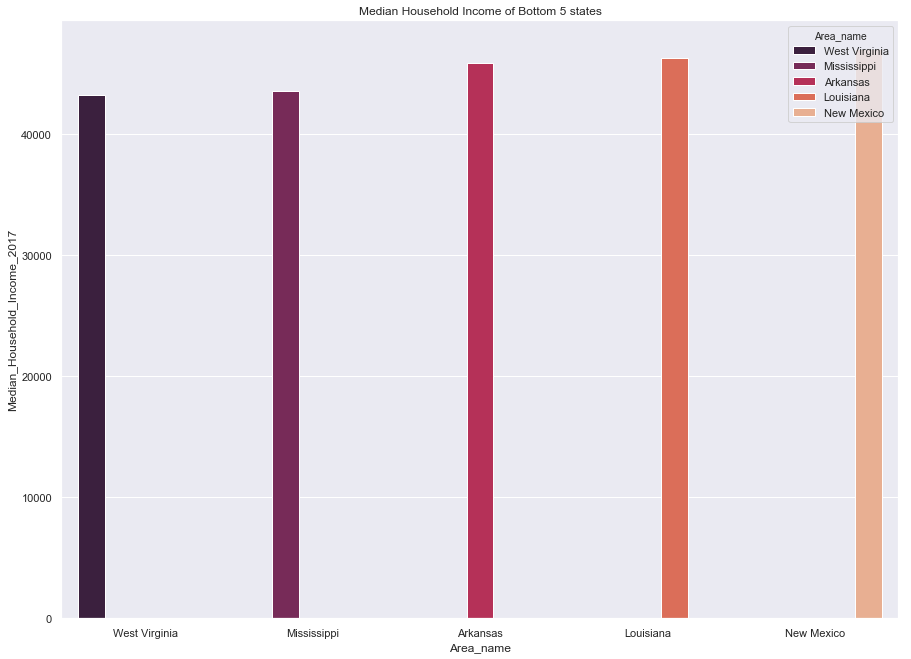

In [45]:
df_plot = data_unemp_agg.sort_values(["Median_Household_Income_2017"], ascending=True)
ax6 = sns.barplot(x="Area_name", y="Median_Household_Income_2017",hue="Area_name", palette="rocket",  data=df_plot[:5])
ax6.set_title('Median Household Income of Bottom 5 states')

In [ ]:
##### Labor Force Vs Median Income Vs Unemployed Vs Income Class 2017 #####

In [46]:
def GenerateClass(i):
    if i>70000: #<=7:
        return 'High'
    elif (i >=60000 and i <70000): #(x[i]>7 and x[i]<=9):
        return 'Moderate'
    elif (i >=50000 and i <60000): #(x[i]>9 and x[i]<=11):
        return 'Medium'
    else:
        return 'Low'

In [47]:
new_df = data_unemp_agg
new_df['Income tag'] = new_df['Median_Household_Income_2017'].apply(lambda row: GenerateClass(row))
new_df = new_df[['Civilian_labor_force_2017','Median_Household_Income_2017','Unemployed_2017','Income tag' ]]
new_df.head()

Civilian_labor_force_2017  Median_Household_Income_2017  Unemployed_2017  \
0                  2178243.0                       48193.0          96567.0   
1                   360759.0                       74058.0          25077.0   
2                  3327949.0                       56508.0         162822.0   
3                  1347630.0                       45916.0          49978.0   
4                 19205295.0                       71785.0         919803.0   

  Income tag  
0        Low  
1       High  
2     Medium  
3        Low  
4       High

In [48]:
import plotly.express as px
import plotly.graph_objects as go

In [49]:
fig1 = px.scatter_3d(new_df, x='Civilian_labor_force_2017', y='Median_Household_Income_2017', z='Unemployed_2017',
              color='Income tag')
fig1.update_layout(
    title=go.layout.Title(
        text="Labor Force Vs Median Income Vs Unemployed Vs Income Class: 2017",
        xref="paper",
        x=0
    )
)
fig1.show()